## Xarray with Climate Data

Now let's work on some real world climate datasets. Let's first open a netCDF file containing a single time-slice from a low-resolution CESM ocean model (POP) output.

We will use data from the iHESP HighResMIP 1950-control simulation, run for 130 years, forced by perpetual 1950 Greenhouse Gas (GHG) emissions. https://ihesp.tamu.edu/products/ihesp-products/Datasets.html#global-datasets 

In [63]:
import xarray as xr
filename='/scratch/training/intro_pangeo/datasets/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002\
/ocn/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.pop.h.0035.01-06.nc'
ds = xr.open_dataset(filename)
ds

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 6, transport_comp: 5, transport_reg: 2, z_t: 60, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates: (12/14)
    transport_components  (transport_comp) |S256 ...
    transport_regions     (transport_reg) |S256 ...
  * time                  (time) object 0035-01-17 00:00:00 ... 0035-06-16 12...
  * z_t                   (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
    ...                    ...
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                 (nlat, nlon) float64 ...
    ULAT                  (nlat, nlon) float64 ...
    TLONG                 (nlat, nlon) float64 ...
    TLAT                  (nlat, nlon) float64 ...
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/162)
    time_bound            (time, d2) object ...
    moc_components        (moc_comp) |S256 ...
    dz                    (z_t) float32 ...
    dzw                   (z_w) float32 ...
    KMT                   (nlat, nlon) float64 ...
    KMU                   (nlat, nlon) float64 ...
    ...                    ...
    U2_2                  (time, nlat, nlon) float32 ...
    V1_1                  (time, nlat, nlon) float32 ...
    V2_2                  (time, nlat, nlon) float32 ...
    XBLT                  (time, nlat, nlon) float32 ...
    XMXL                  (time, nlat, nlon) float32 ...
    XMXL_2                (time, nlat, nlon) float32 ...
Attributes: (12/14)
    title:                      b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002
    history:                    Thu Apr 22 20:06:12 2021: ncrcat b.e13.B1950C...
    Conventions:                CF-1.0; http://www.cgd.ucar.edu/cms/eaton/net...
    contents:                   Diagnostic and Prognostic Variables
    source:                     CCSM POP2, the CCSM Ocean Component
    revision:                   $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlev...
    ...                         ...
    cell_methods:               cell_methods = time: mean ==> the variable va...
    nsteps_total:               310250
    tavg_sum:                   86400.0
    tavg_sum_qflux:             86400.0
    NCO:                        netCDF Operators version 4.7.9 (Homepage = ht...
    history_of_appended_files:  Wed Aug  5 15:09:22 2020: Appended file b.e13...

## NetCDF CF (Climate and forecast) Metadata Conventions

Standards "designed to promote the processing and sharing of files created with the NetCDF API". Widely adopted by the weather and climate research centers like PRISM, ESMF, NCAR, Hadley Centre, GFDL, PCMDI and *MIP, and various EU projects. The standard addresses the following aspects of any netCDF file:

1. Information about the origin of the data, such as title, source institution, history, references, etc. 
2. Data description, such as units, standard name, long name, fill value, valid range, etc
3. Dimensions and coordinates
4. Time and calendar specification
5. Bounds (Ex: area of lon–lat boxes, thickness of a vertical layer, length of a time-mean period)
6. Cell methods (Ex: point, sum)

See: http://cfconventions.org/Data/cf-documents/overview/viewgraphs.pdf

xarray can automatically leverage CF-compliant metadata, if it is available in your netCDF file(s). This includes automatic labeling of plots with correct names and units, decoding datetime and timedelta arrays, and support for [non-standard calendars](https://xarray.pydata.org/en/stable/weather-climate.html#cftimeindex) used in climate science. When decoding/encoding datetimes for non-standard calendars or for dates before year 1678 or after year 2262, xarray uses the `cftime` library


#### Inspect the SALT variable

In [22]:
ds.SALT # or ds['SALT']

<xarray.DataArray 'SALT' (time: 6, z_t: 60, nlat: 384, nlon: 320)>
[44236800 values with dtype=float32]
Coordinates:
  * time     (time) object 0035-01-17 00:00:00 ... 0035-06-16 12:00:00
  * z_t      (z_t) float32 500.0 1.5e+03 2.5e+03 ... 5.125e+05 5.375e+05
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean

#### Slice variable 

In [23]:
ds.SALT.isel(z_t=1)

<xarray.DataArray 'SALT' (time: 6, nlat: 384, nlon: 320)>
[737280 values with dtype=float32]
Coordinates:
  * time     (time) object 0035-01-17 00:00:00 ... 0035-06-16 12:00:00
    z_t      float32 1.5e+03
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:     Salinity
    units:         gram/kilogram
    grid_loc:      3111
    cell_methods:  time: mean

Applying the mean operation on a variable is as simple as 

In [24]:
mean_salt = ds.SALT.mean(dim='z_t')
mean_salt

<xarray.DataArray 'SALT' (time: 6, nlat: 384, nlon: 320)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [34.449455, 34.446716, 34.444374, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [34.414036, 34.41039 , 34.407135, ...,       nan,       nan,
               nan],
...
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [34.4275  , 34.42581 , 34.423904, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * time     (time) object 0035-01-17 00:00:00 ... 0035-06-16 12:00:00
    ULONG    (nlat, nlon) float64 ...
    ULAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon

#### Plot a slice of data. Notice the convenient chaining of xarray operations

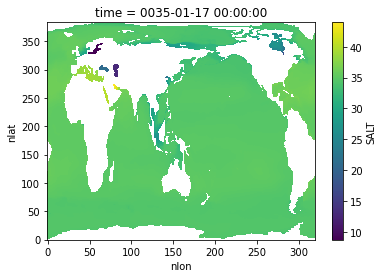

In [26]:
mean_salt.isel(time=0).plot()

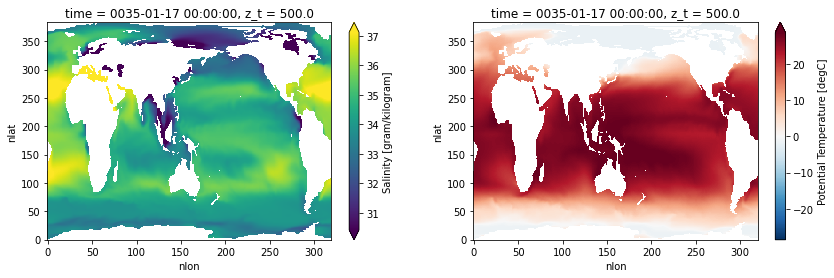

In [55]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
ds.SALT.isel(time=0,z_t=0).plot(ax=ax1, robust=True)
ds.TEMP.isel(time=0,z_t=0).plot(ax=ax2, robust=True)

#### A better plot using a Plate Carree projection from Cartopy

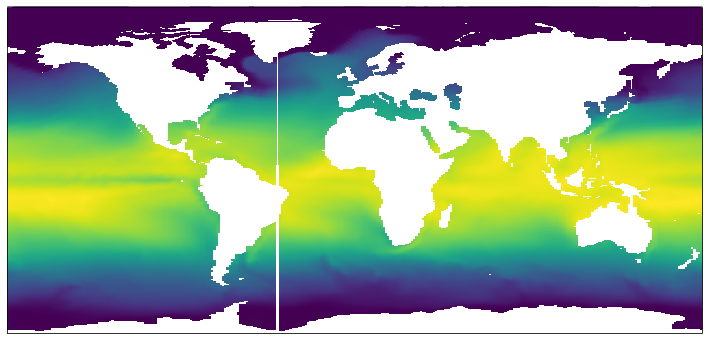

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/training/intro_pangeo/datasets/cartopy_features'

fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());

lon = ds.TLONG
lat = ds.TLAT
var = ds.TEMP.isel(time=0,z_t=0)

ax.pcolormesh(lon,lat,var,transform=cartopy.crs.PlateCarree(),shading='flat');

#### Plotting coastlines, land, and lakes using Cartopy. And including other matplotlib niceties

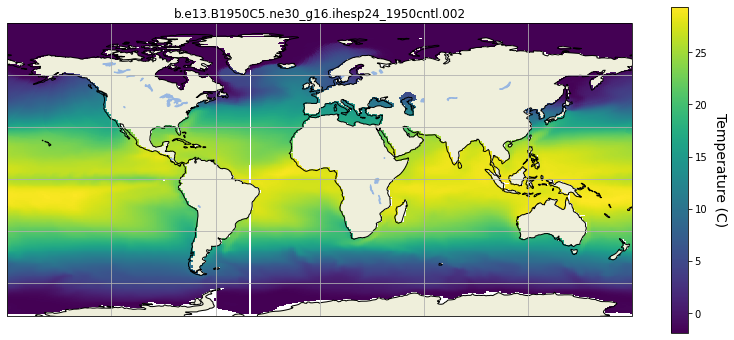

In [9]:
fig = plt.figure(figsize=(14,6))
ax = plt.axes(projection=cartopy.crs.PlateCarree());
im = ax.pcolormesh(lon,lat,var,transform=cartopy.crs.PlateCarree(),shading='flat');

ax.set_title(ds.title)
ax.coastlines();
ax.gridlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.LAKES)


cbar= plt.colorbar(im)
cbar.set_label('Temperature (C)', rotation=270, labelpad=20, fontsize=14)

#### Let's save our plot

In [10]:
fig.savefig('temperature.png',dpi=400)

#### Zoom in on a region

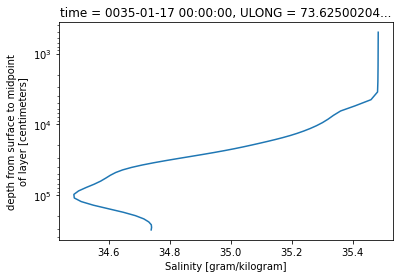

In [54]:
ds.SALT[0,:, 100,100].plot(y='z_t',yincrease=False, yscale='log');

Close the dataset explicitly

In [16]:
ds.close()

</br>

### Exercise

With the provided input file, and `open_dataset` function call, calculate and plot the following quantities side-by-side

- The zonal average of time-averaged TEMP. x-axis: nlat, y-axis: z_t (depth) 
- An instantaenous vertical cross-section of SALT. x-axis: nlon, y-axis: z_t (depth) 

Make sure the depth increases in the downward direction. 

In [62]:
import xarray as xr

filename='/scratch/training/intro_pangeo/datasets/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002\
/ocn/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.pop.h.0035.01-06.nc'
ds = xr.open_dataset(filename)

## Your code here

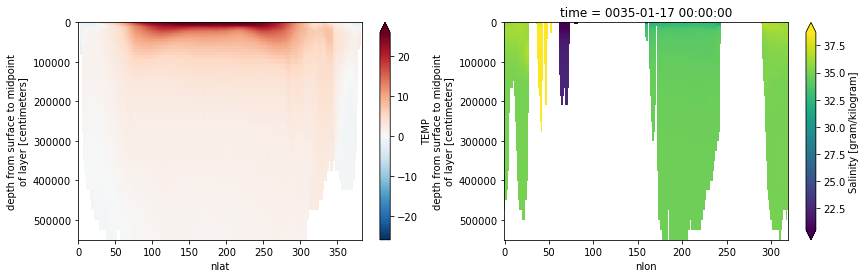

In [62]:
import xarray as xr

filename='/scratch/training/intro_pangeo/datasets/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002\
/ocn/hist/b.e13.B1950C5.ne30_g16.ihesp24_1950cntl.002.pop.h.0035.01-06.nc'
ds = xr.open_dataset(filename)

var1 = ds.TEMP.mean(dim=['nlon','time'])
var2 = ds.SALT.isel(time=0,nlat=300)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
var1.plot(ax=ax1, robust=True, yincrease=False)
var2.plot(ax=ax2, robust=True, yincrease=False)